<a href="https://colab.research.google.com/github/sambitsaha/RegressionAnalysis/blob/main/CreditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition

`Problem Definition: Predicting Credit Card Debt with Machine Learning`
This project aims to develop a machine learning model to predict the average credit card debt (balance) of an individual based on various financial and demographic factors.
The problem at hand is to analyze a dataset containing information about credit card debt for various customers and build a predictive model to estimate the average credit card debt for each individual based on several quantitative predictors such as age, number of credit cards, education level, income, credit limit, and credit rating. Additionally, we need to perform detailed exploratory data analysis (EDA), create linear regression models, and conduct outlier and residual analysis. Finally, we must evaluate the model's performance, consider the bias-variance trade-off, and propose any necessary improvements.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Credit_assignment.csv')

# Data Preparation
Here's a summarry of the data preparation steps I've done:

**Data exploration and cleaning:**

* The data was initially examined using `df.info()`, checking for data types, missing values, and overall structure.
* Missing values were likely identified and addressed.
* The data was further inspected using `head` and `tail` functions to get a glimpse of the first and last few rows, understanding the data format and content.

**Feature engineering:**

* New features were created to potentially improve model performance:
    * Debt to Income Ratio:
    * Credit Limit Utilization Ratio:
    * Income Category and Age Category:
    * Age Income Interaction:

**Data transformation:**

* Categorical features were likely hot-encoded to represent them numerically for machine learning algorithms that typically work better with numerical data.

**Outlier analysis and treatment:**

* Boxplots were created to visualize the distribution of features, potentially including 'Limit', 'Age_Income_Interaction', and others.
* Winsorization, a method to cap outliers, was applied to address outliers in 'Limit' and 'Age_Income_Interaction'.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Credit_assignment.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Income     400 non-null    float64
 1   Limit      400 non-null    int64  
 2   Rating     400 non-null    int64  
 3   Cards      400 non-null    int64  
 4   Age        400 non-null    int64  
 5   Education  400 non-null    int64  
 6   Own        400 non-null    object 
 7   Student    400 non-null    object 
 8   Married    400 non-null    object 
 9   Region     400 non-null    object 
 10  Balance    400 non-null    int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 34.5+ KB


In [ ]:
print(df.isnull().sum())

Income       0
Limit        0
Rating       0
Cards        0
Age          0
Education    0
Own          0
Student      0
Married      0
Region       0
Balance      0
dtype: int64


There's no `missing values`

In [ ]:
df.head()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [ ]:
df.tail()

,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
395,12.096,4100,307,3,32,13,No,No,Yes,South,560
396,13.364,3838,296,5,65,17,No,No,No,East,480
397,57.872,4171,321,5,67,12,Yes,No,Yes,South,138
398,37.728,2525,192,1,44,13,No,No,Yes,South,0
399,18.701,5524,415,5,64,7,Yes,No,No,West,966


`Feature Engineering`

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

df = pd.read_csv('Credit_assignment.csv')

df['Debt_to_Income_Ratio'] = df['Balance'] / df['Income']
df['Credit_Limit_Utilization'] = df['Balance'] / df['Limit']
df['Income_Category'] = pd.qcut(df['Income'], 3, labels=['Low', 'Medium', 'High'])  # Divide income into 3 categories
df['Age_Category'] = pd.cut(df['Age'], 3, labels=['Young', 'Middle-aged', 'Retired'])  # Divide age into 3 categories

In [ ]:
df['Age_Income_Interaction'] = df['Age'] * df['Income']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Income                    400 non-null    float64 
 1   Limit                     400 non-null    int64   
 2   Rating                    400 non-null    int64   
 3   Cards                     400 non-null    int64   
 4   Age                       400 non-null    int64   
 5   Education                 400 non-null    int64   
 6   Own                       400 non-null    object  
 7   Student                   400 non-null    object  
 8   Married                   400 non-null    object  
 9   Region                    400 non-null    object  
 10  Balance                   400 non-null    int64   
 11  Debt_to_Income_Ratio      400 non-null    float64 
 12  Credit_Limit_Utilization  400 non-null    float64 
 13  Income_Category           400 non-null    category

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['Own', 'Student', 'Married', 'Region']
encoder = OneHotEncoder(handle_unknown='ignore')
encoded_data = encoder.fit_transform(df[categorical_features])
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(categorical_features))

In [ ]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Own_No        400 non-null    float64
 1   Own_Yes       400 non-null    float64
 2   Student_No    400 non-null    float64
 3   Student_Yes   400 non-null    float64
 4   Married_No    400 non-null    float64
 5   Married_Yes   400 non-null    float64
 6   Region_East   400 non-null    float64
 7   Region_South  400 non-null    float64
 8   Region_West   400 non-null    float64
dtypes: float64(9)
memory usage: 28.2 KB


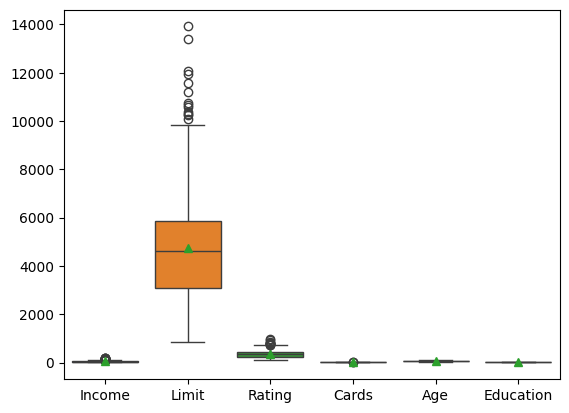

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', ]


sns.boxplot(
    data=df_new[numerical_features],
    orient="v",
    showmeans=True,
)
plt.show()

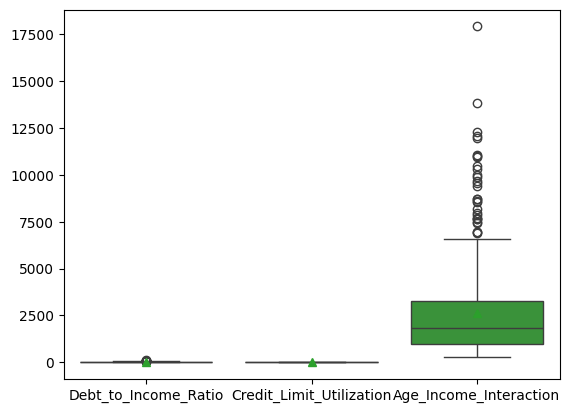

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = ['Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction']

sns.boxplot(
    data=df_new[numerical_features],
    orient="v",
    showmeans=True,
)
plt.show()

Number of outliers in 'Limit': 13


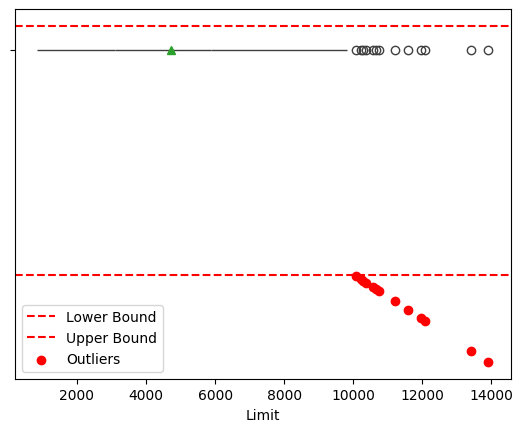

In [ ]:
import seaborn as sns
import numpy as np

# Define 'Limit' outliers using IQR
def find_outliers_iqr(data, col):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return data[(data[col] < lower_bound) | (data[col] > upper_bound)], lower_bound, upper_bound  # Return outliers, lower_bound, upper_bound

# Identify outliers in 'Limit'
outliers_limit, lower_bound, upper_bound = find_outliers_iqr(df_new, 'Limit')

# Print number of outliers
print(f"Number of outliers in 'Limit': {outliers_limit.shape[0]}")

# Visualize outliers with boxplot
sns.boxplot(
    x = df_new['Limit'],
    showmeans=True,
)
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.scatter(outliers_limit['Limit'], outliers_limit['Limit'], color='red', label='Outliers')
plt.legend()
plt.show()


In [ ]:
import seaborn as sns
import numpy as np

# Winsorization (capping outliers) method to remove outliers
def winsorize(data, lower_percentile=5, upper_percentile=95):
  """
  Winsorizes data by capping outliers at specified percentiles.

  Args:
      data: The data array to be winsorized.
      lower_percentile: The lower percentile to use for capping (default: 5).
      upper_percentile: The upper percentile to use for capping (default: 95).

  Returns:
      The winsorized data array.
  """
  winsorized_limit = winsorize(df_new['Limit'], lower_percentile=2, upper_percentile=98)  # Adjust percentiles if needed
  df_new['Limit_Winsorized'] = winsorized_limit

print("Outliers removed using the winsorization method!")

Outliers removed using the winsorization method!


Number of outliers in 'Age_Income_Interaction': 30


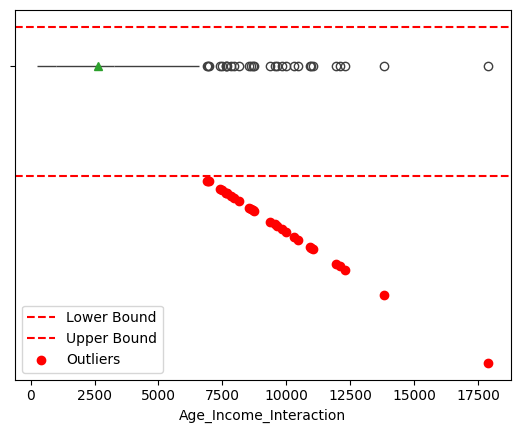

Outliers removed using the winsorization method!


In [ ]:
import seaborn as sns
import numpy as np

# Define 'Age_Income_Interaction' outliers using IQR
def find_outliers_iqr(data, col):
  q1 = data[col].quantile(0.25)
  q3 = data[col].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return data[(data[col] < lower_bound) | (data[col] > upper_bound)], lower_bound, upper_bound

# Identify outliers in 'Age_Income_Interaction'
outliers_limit, lower_bound, upper_bound = find_outliers_iqr(df_new, 'Age_Income_Interaction')

# Print number of outliers
print(f"Number of outliers in 'Age_Income_Interaction': {outliers_limit.shape[0]}")

# Visualize outliers with boxplot
sns.boxplot(
    x = df_new['Age_Income_Interaction'],
    showmeans=True,
)
plt.axhline(y=lower_bound, color='red', linestyle='--', label='Lower Bound')
plt.axhline(y=upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.scatter(outliers_limit['Age_Income_Interaction'], outliers_limit['Age_Income_Interaction'], color='red', label='Outliers')
plt.legend()
plt.show()

# Winsorization (capping outliers) method to remove outliers
def winsorize(data, lower_percentile=5, upper_percentile=95):
  """
  Winsorizes data by capping outliers at specified percentiles.

  Args:
      data: The data array to be winsorized.
      lower_percentile: The lower percentile to use for capping (default: 5).
      upper_percentile: The upper percentile to use for capping (default: 95).

  Returns:
      The winsorized data array.
  """
  winsorized_limit = winsorize(df_new['Age_Income_Interaction'], lower_percentile=2, upper_percentile=98)  # Adjust percentiles if needed
  df_new['Age_Income_Interaction_Winsorized'] = winsorized_limit

print("Outliers removed using the winsorization method!")


# Data Understanding: Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Credit.csv')

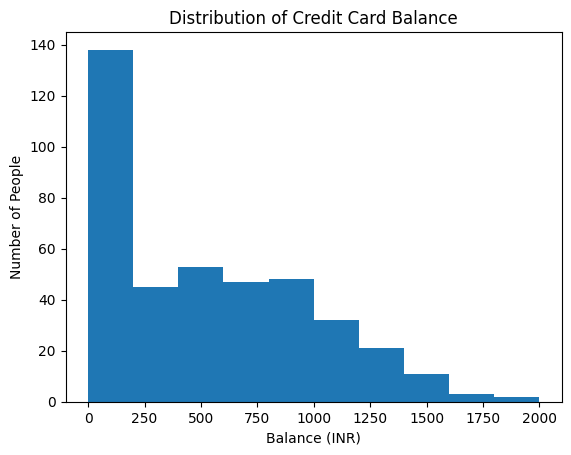

count     400.000000
mean      520.015000
std       459.758877
min         0.000000
25%        68.750000
50%       459.500000
75%       863.000000
max      1999.000000
Name: Balance, dtype: float64


In [ ]:
# Distribution of Balance
plt.hist(df['Balance'])
plt.xlabel('Balance (INR)')
plt.ylabel('Number of People')
plt.title('Distribution of Credit Card Balance')
plt.show()

# Descriptive statistics for Balance
print(df['Balance'].describe())

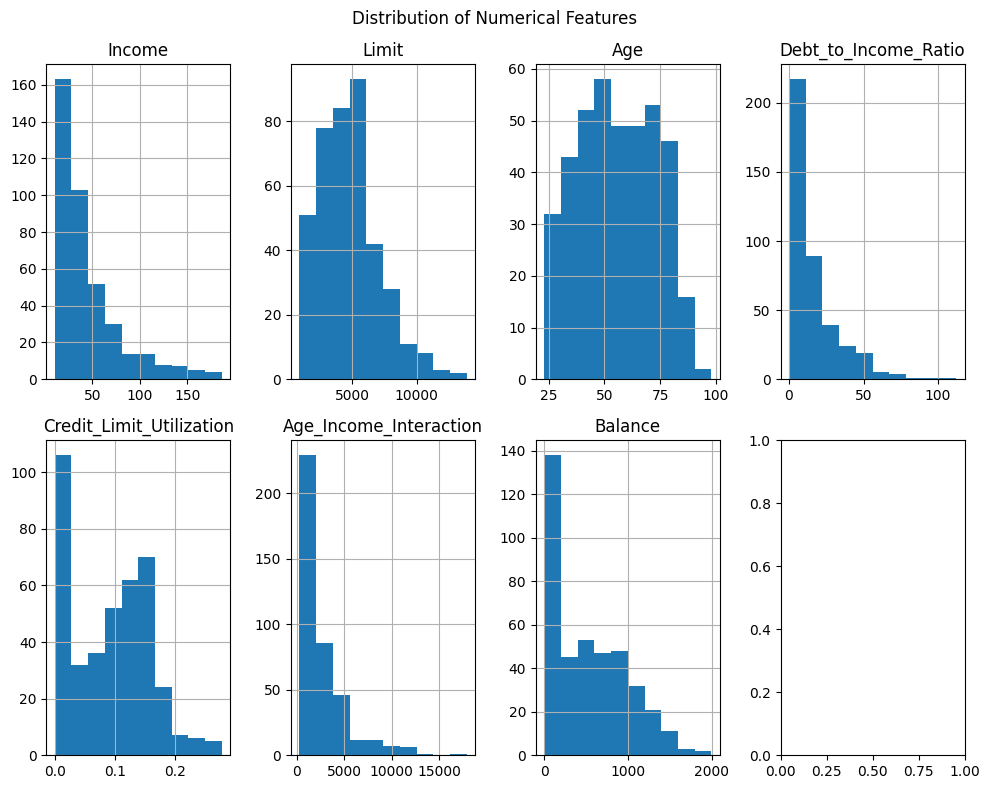

In [ ]:
numerical_features = ['Income', 'Limit', 'Age', 'Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction', 'Balance']

fig, axes = plt.subplots(2, 4, figsize=(10, 8))

for i, feature in enumerate(numerical_features):
    ax = axes.flat[i]
    df[feature].hist(ax=ax)
    ax.set_title(feature)

plt.suptitle('Distribution of Numerical Features')
plt.tight_layout()
plt.show()

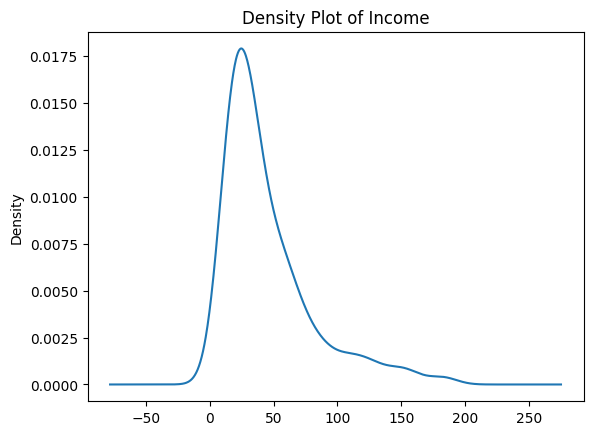

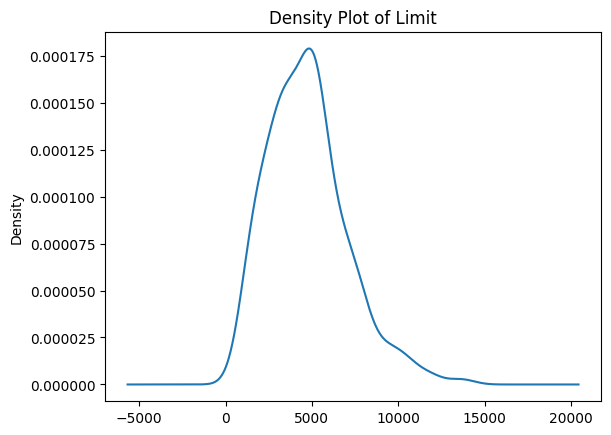

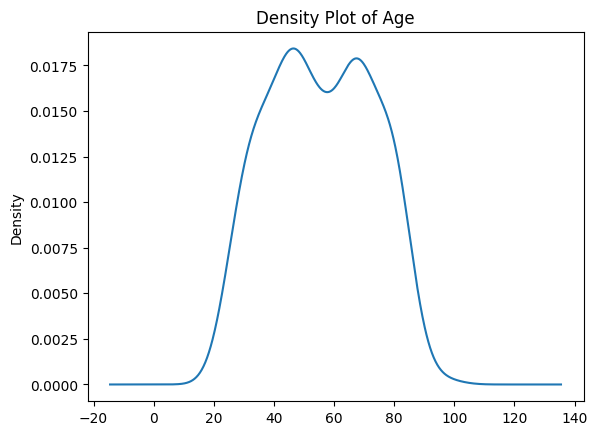

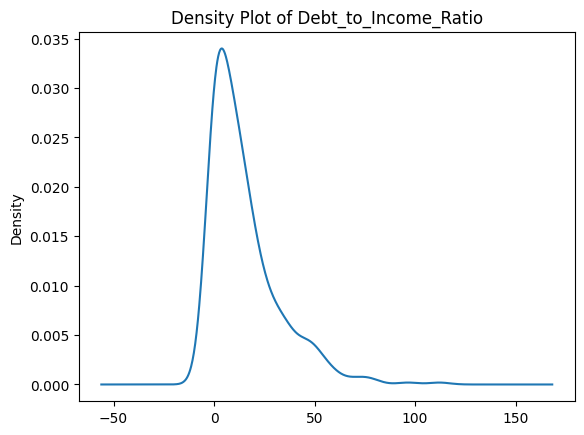

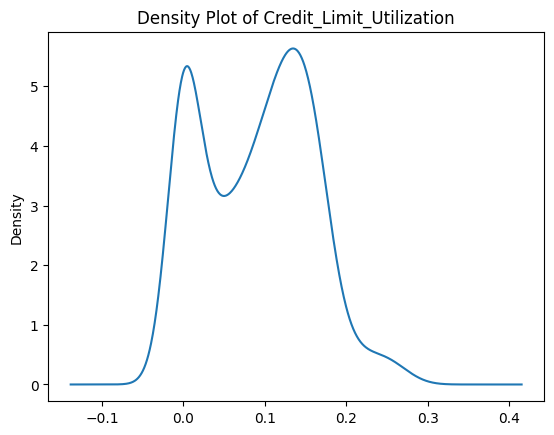

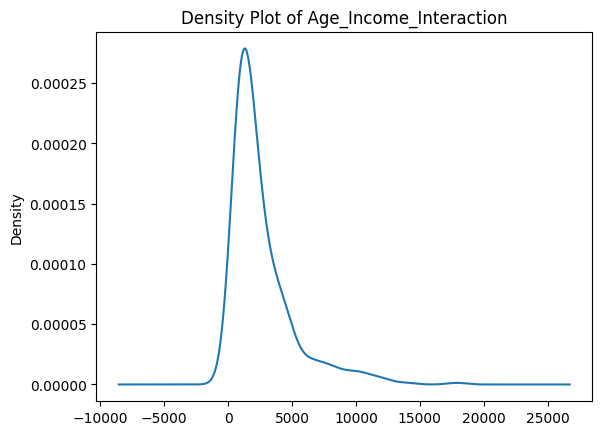

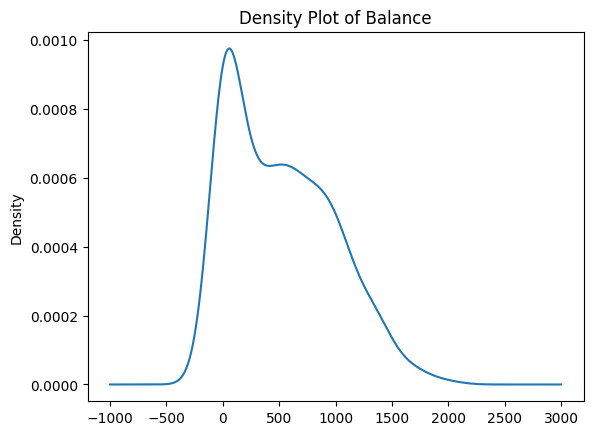

In [ ]:
# Select numerical features for density plots
numerical_features = ['Income', 'Limit', 'Age', 'Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction', 'Balance']

for feature in numerical_features:
    df[feature].plot.density()
    plt.title(f'Density Plot of {feature}')
    plt.show()

There are `multiple peaks` for **Age** & **Credit Limit Utilization**. This needs to be analyzed further to understand underlying factors

<Figure size 1000x600 with 0 Axes>

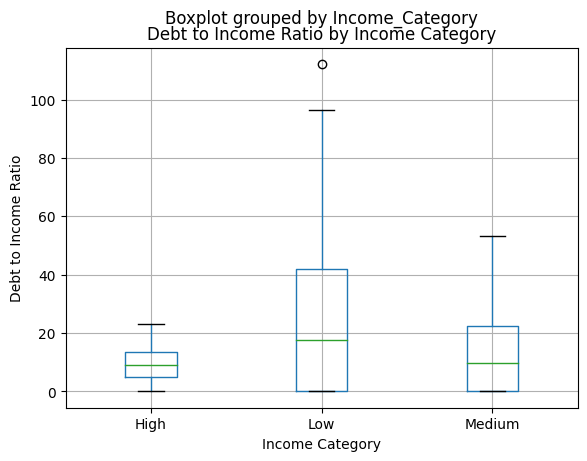

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot(by='Income_Category', column='Debt_to_Income_Ratio')
plt.xlabel('Income Category')
plt.ylabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio by Income Category')
plt.show()

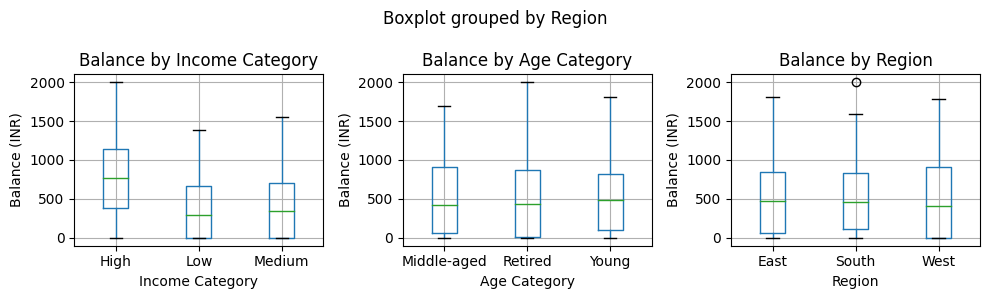

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Credit.csv')

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

df.boxplot(by='Income_Category', column='Balance', ax=axes[0])
axes[0].set_xlabel('Income Category')
axes[0].set_ylabel('Balance (INR)')
axes[0].set_title('Balance by Income Category')

df.boxplot(by='Age_Category', column='Balance', ax=axes[1])
axes[1].set_xlabel('Age Category')
axes[1].set_ylabel('Balance (INR)')
axes[1].set_title('Balance by Age Category')

df.boxplot(by='Region', column='Balance', ax=axes[2])
axes[2].set_xlabel('Region')
axes[2].set_ylabel('Balance (INR)')
axes[2].set_title('Balance by Region')

plt.tight_layout()
plt.show()

In [ ]:
categorical_features = ['Income_Category', 'Age_Category', 'Own', 'Student',
                         'Married', 'Region']

for feature in categorical_features:
    print(df[feature].value_counts())
    print('---')

table = pd.crosstab(df['Income_Category'], df['Age_Category'])
print(table)

Low       134
High      133
Medium    133
Name: Income_Category, dtype: int64
---
Middle-aged    170
Young          154
Retired         76
Name: Age_Category, dtype: int64
---
Yes    207
No     193
Name: Own, dtype: int64
---
No     360
Yes     40
Name: Student, dtype: int64
---
Yes    245
No     155
Name: Married, dtype: int64
---
South    199
West     102
East      99
Name: Region, dtype: int64
---
Age_Category     Middle-aged  Retired  Young
Income_Category                             
High                      53       35     45
Low                       62       16     56
Medium                    55       25     53


In [ ]:
df.describe()

,Income,Limit,Rating,Cards,Age,Education,Debt_to_Income_Ratio,Credit_Limit_Utilization,Age_Income_Interaction,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,15.119907,0.089581,2623.553978,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,17.190500,0.067578,2490.965514,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000,0.000000,262.575000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,1.521218,0.018511,995.498250,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,9.975859,0.098734,1821.673500,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,21.266057,0.143246,3245.041250,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,112.156429,0.276930,17907.344000,1999.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    400 non-null    float64
 1   Limit                     400 non-null    int64  
 2   Rating                    400 non-null    int64  
 3   Cards                     400 non-null    int64  
 4   Age                       400 non-null    int64  
 5   Education                 400 non-null    int64  
 6   Debt_to_Income_Ratio      400 non-null    float64
 7   Credit_Limit_Utilization  400 non-null    float64
 8   Income_Category           400 non-null    object 
 9   Age_Category              400 non-null    object 
 10  Age_Income_Interaction    400 non-null    float64
 11  Own                       400 non-null    object 
 12  Student                   400 non-null    object 
 13  Married                   400 non-null    object 
 14  Region    

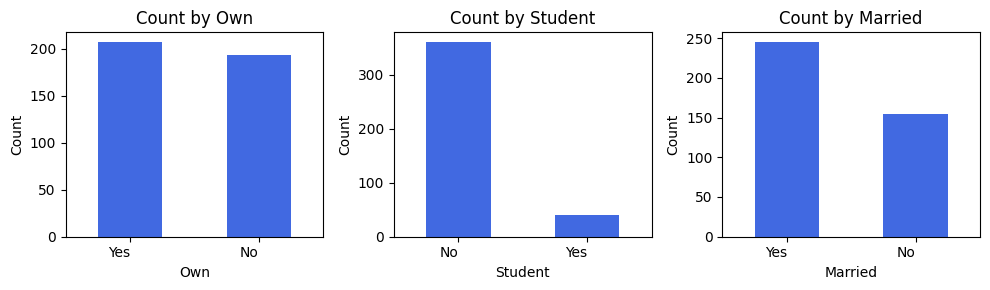

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Credit.csv')

plt.figure(figsize=(10, 3))

categorical_variables = ['Own', 'Student', 'Married']

for i, var in enumerate(categorical_variables):
    plt.subplot(1, 3, i + 1)

    category_counts = df[var].value_counts()

    category_counts.plot(kind='bar', color='royalblue')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title(f'Count by {var}')
    plt.xticks(rotation=0, ha='right')

plt.tight_layout()
plt.show()

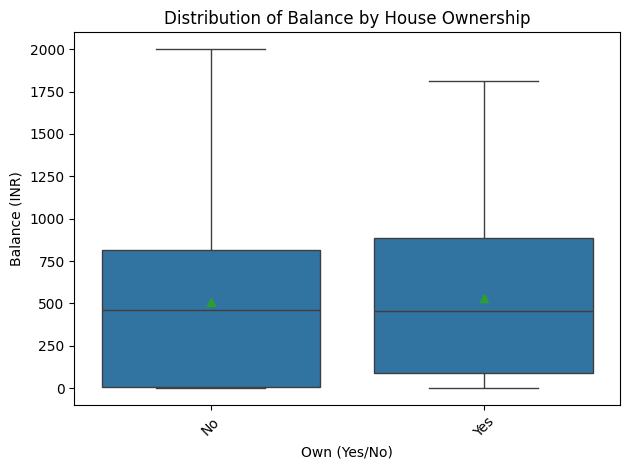

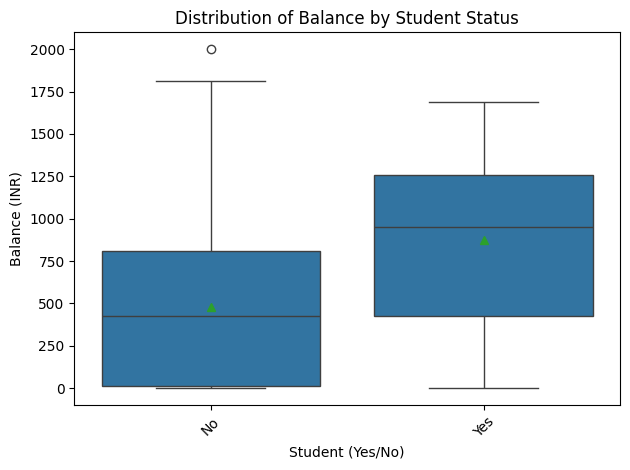

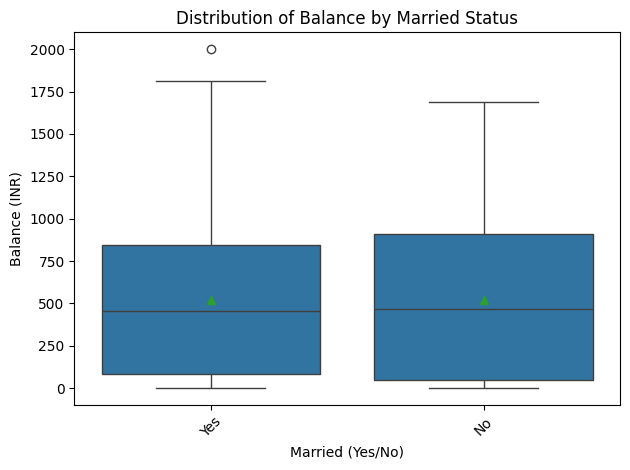

In [ ]:
sns.boxplot(
    x = "Own",
    y = "Balance",
    showmeans=True,
    data=df
)

plt.xlabel("Own (Yes/No)")
plt.ylabel("Balance (INR)")
plt.title("Distribution of Balance by House Ownership")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

sns.boxplot(
    x = "Student",
    y = "Balance",
    showmeans=True,
    data=df
)

plt.xlabel("Student (Yes/No)")
plt.ylabel("Balance (INR)")
plt.title("Distribution of Balance by Student Status")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

sns.boxplot(
    x = "Married",
    y = "Balance",
    showmeans=True,
    data=df
)

plt.xlabel("Married (Yes/No)")
plt.ylabel("Balance (INR)")
plt.title("Distribution of Balance by Married Status")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df.corr()

<ipython-input-145-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Income,Limit,Rating,Cards,Age,Education,Debt_to_Income_Ratio,Credit_Limit_Utilization,Age_Income_Interaction,Balance
Income,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,-0.270853,0.123833,0.911340,0.463656
Limit,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.236273,0.615683,0.716199,0.861697
Rating,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.239649,0.618320,0.715791,0.863625
Cards,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.134185,0.109090,-0.016872,0.086456
Age,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,-0.139658,-0.082696,0.478272,0.001835
Education,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008628,-0.009688,-0.017928,-0.008062
Debt_to_Income_Ratio,-0.270853,0.236273,0.239649,0.134185,-0.139658,-0.008628,1.000000,0.794219,-0.250631,0.569796
Credit_Limit_Utilization,0.123833,0.615683,0.618320,0.109090,-0.082696,-0.009688,0.794219,1.000000,0.091186,0.884774
Age_Income_Interaction,0.911340,0.716199,0.715791,-0.016872,0.478272,-0.017928,-0.250631,0.091186,1.000000,0.405389
Balance,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,0.569796,0.884774,0.405389,1.000000


<ipython-input-150-c9823df42a67>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Balance'].sort_values(ascending=False).plot(kind='bar')


<Axes: >

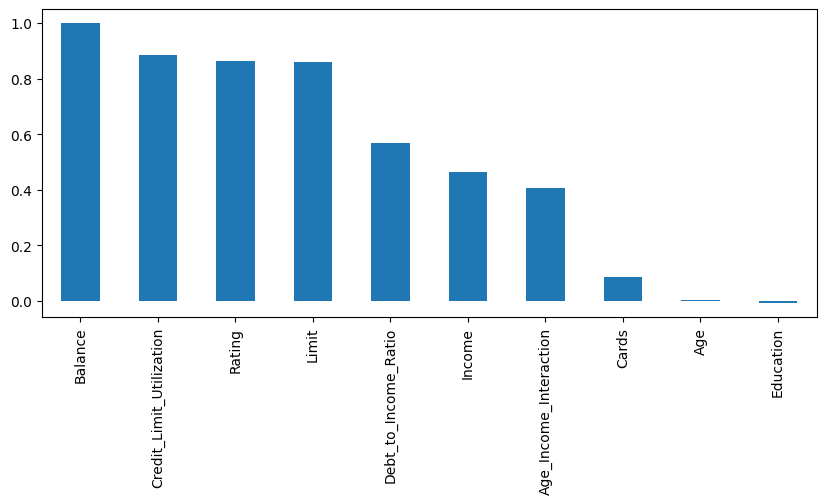

In [ ]:
plt.figure(figsize=(10,4))
df.corr()['Balance'].sort_values(ascending=False).plot(kind='bar')

<ipython-input-151-4abb72d729a5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Paired')


<Axes: >

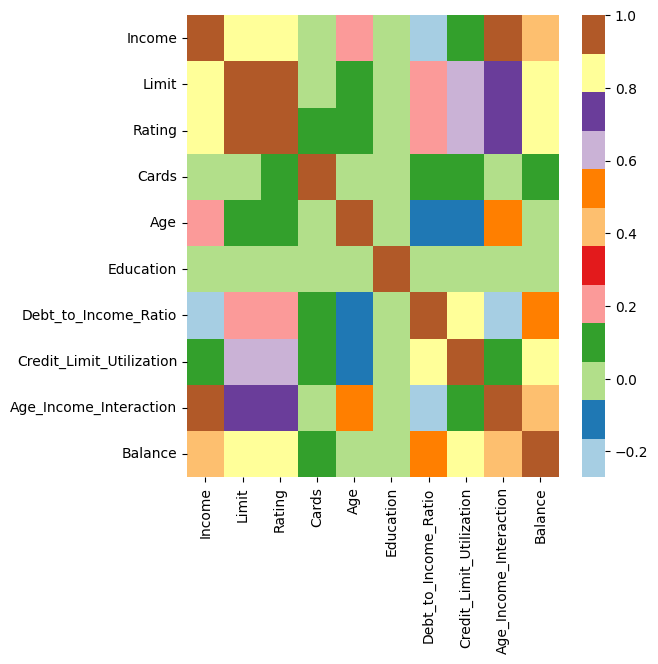

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(), cmap='Paired')

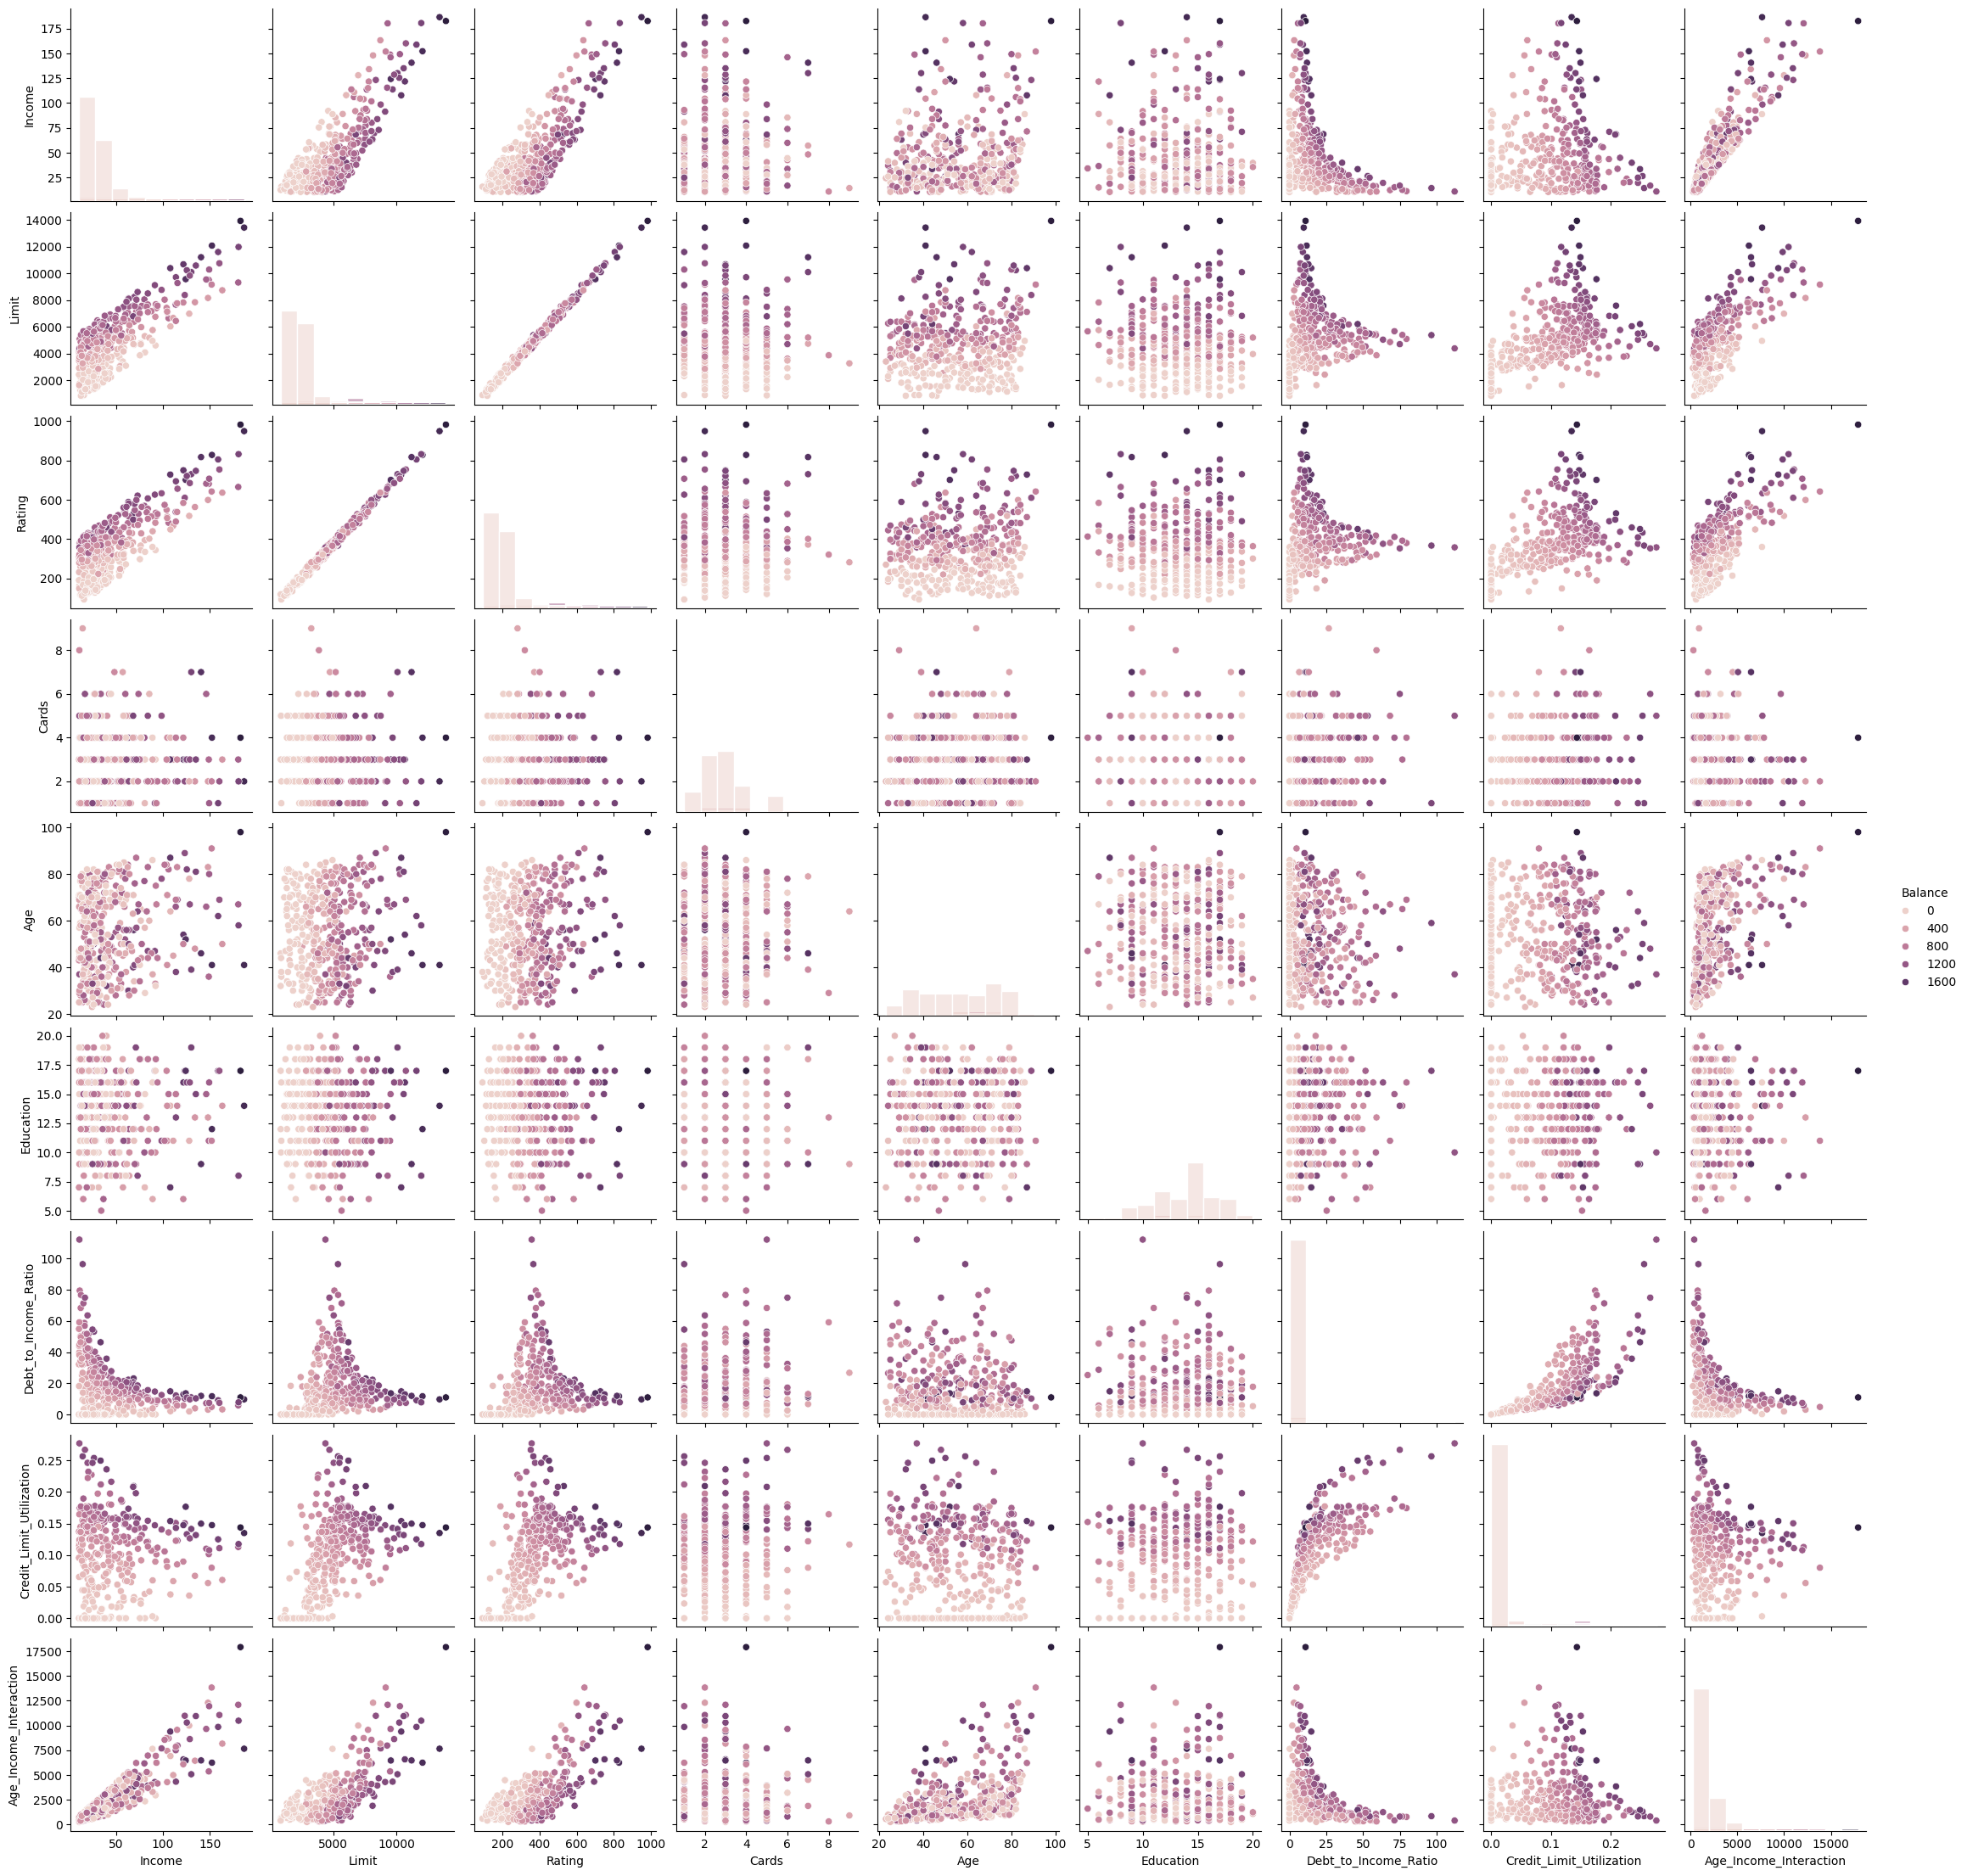

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('Credit.csv')

columns = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction', 'Balance']

sns.pairplot(df[columns], hue="Balance", kind="scatter", diag_kind="hist", diag_kws={"bins": 10, "edgecolor": "white", "alpha": 0.5})

plt.show()

# `Key Insights from Exploratory Data Analysis (EDA):`

**Debt-to-Income Ratio:**

- The **low-income category** exhibits the **highest average Debt-to-Income Ratio** and also shows the **highest variability** in this ratio. This suggests that individuals with lower incomes might be carrying a larger proportion of their income as debt, with a wider range in their debt burden.

**Balance: "Average Credit Card Debt"**

- The **high-income category** has the **highest average Balance**. While they might have more credit available, it also indicates potentially higher debt levels within this group on average.
- **Students** have the **highest average Balance** and the **greatest spread** in Balance. This suggests that students, on average, carry more debt than other groups, with a wider range of debt levels within the student population.

**Balance Correlations:**

- Strong correlations exist between Balance and **Credit Limit Utilization**, **Rating**, and **Credit Limit**. This indicates that individuals with higher credit utilization, lower ratings, and larger credit limits tend to carry higher balances.
- Balance has a **medium correlation** with **Debt-to-Income Ratio**, **Income**, and **Age Income Interaction**. These relationships are worth further investigation.
- **No significant correlations** were observed between Balance and **Number of Cards**, **Age**, and **Education**.

# Model Building, Evaluation & Improving Model

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    400 non-null    float64
 1   Limit                     400 non-null    int64  
 2   Rating                    400 non-null    int64  
 3   Cards                     400 non-null    int64  
 4   Age                       400 non-null    int64  
 5   Education                 400 non-null    int64  
 6   Debt_to_Income_Ratio      400 non-null    float64
 7   Credit_Limit_Utilization  400 non-null    float64
 8   Income_Category           400 non-null    object 
 9   Age_Category              400 non-null    object 
 10  Age_Income_Interaction    400 non-null    float64
 11  Own                       400 non-null    object 
 12  Student                   400 non-null    object 
 13  Married                   400 non-null    object 
 14  Region    

Model R-squared (accuracy): 0.9561
Mean Squared Error: 7334.211459279558
Root Mean Squared Error: 85.64001085520458
Mean Absolute Error: 73.10364699644205
Adjusted R-squared: 0.9458132984270712


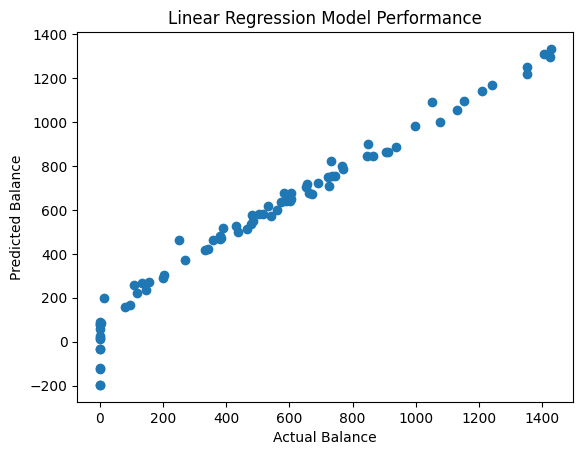

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error

# Defining the custom function for adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adjusted_r2

df = pd.read_csv('Credit.csv')

# Pre-processing of data (handling of categorical variables)
categorical_cols = ['Income_Category', 'Age_Category', 'Own', 'Student', 'Married', 'Region']
le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

# Feature scaling (for mixed data types)
numerical_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
                   'Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Spliting of data
X = df.drop('Balance', axis=1)
y = df['Balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluating model performance (R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), )
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
adjusted_r2 = adjusted_r2_score(y_test, y_pred, X_test.shape[1])
print(f"Model R-squared (accuracy): {r2:.4f}")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Adjusted R-squared:", adjusted_r2)

# Visualizing results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Linear Regression Model Performance")
plt.show()

# Additional analysis (to be continued):
# - Outlier analysis (identifing and handling potential outliers)
# - Residual analysis (visualizing and analyzing residuals)

**R-squared (0.9561):**

- This indicates a very strong positive correlation between the features used in the model and the credit card balance.
- In simpler terms, 95.61% of the variation in credit card balance can be explained by the features included in the model. This suggests the model is effective at capturing the linear relationships between features and balance.

**Mean Squared Error (MSE: 7334.21) & Root Mean Squared Error (RMSE: 85.64):**

- While R-squared indicates a good fit, MSE and RMSE provide measures of the average squared difference between predicted and actual values. Lower values are better.

**Mean Absolute Error (MAE: 73.10):**

- This metric represents the average of the absolute differences between predicted and actual values. It's another measure of error, and a lower value is preferable.

**Adjusted R-squared (0.9458):**

- This penalizes the R-squared value for model complexity, potentially providing a more accurate estimate of performance, especially for models with many features.
- The adjusted R-squared being very close to the original R-squared suggests that the model's complexity is not a major concern in this case.

**Scatter Plot:**

- The image shows a tight clustering of data points around the regression line, it visually reinforces the strong correlation captured by the R-squared value.
- Obvious outliers or patterns deviating from the line might indicate areas for improvement or potential issues with the model.

**Overall:**

- The model appears to have a good fit based on R-squared, but it's crucial to consider the error metrics (MSE, RMSE, MAE) in the context of credit card domain.
- A visual inspection of the scatter plot provides further insights into the model's strong performance and potential outliers.

**Additional Considerations:**

- Outlier analysis can help identify data points that significantly influence the model and might require further investigation.
- Residual analysis can explore the distribution of errors and assess the model's assumptions (e.g., normality of errors).

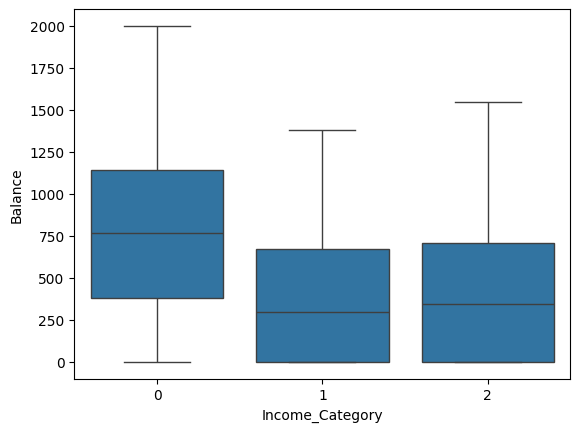

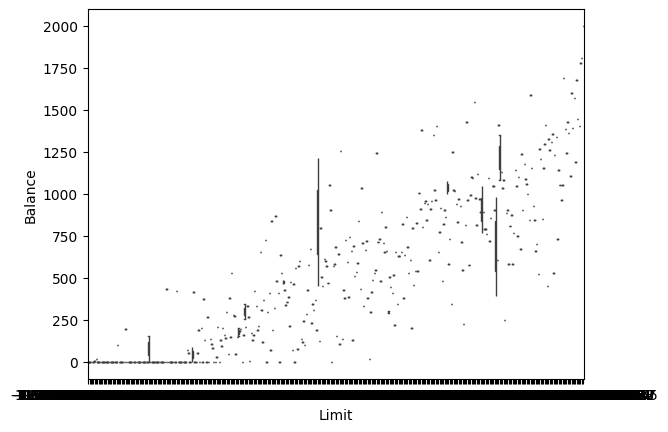

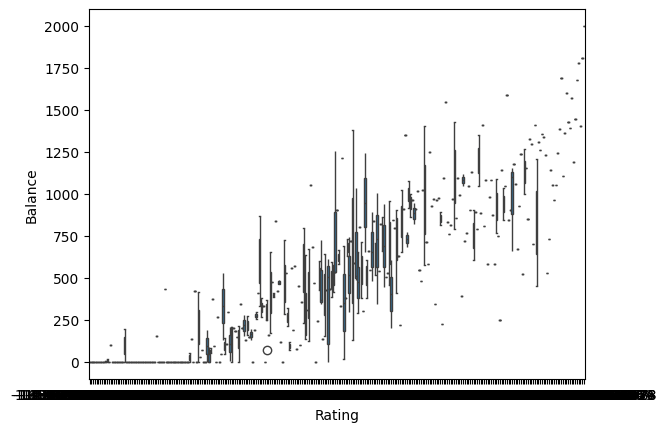

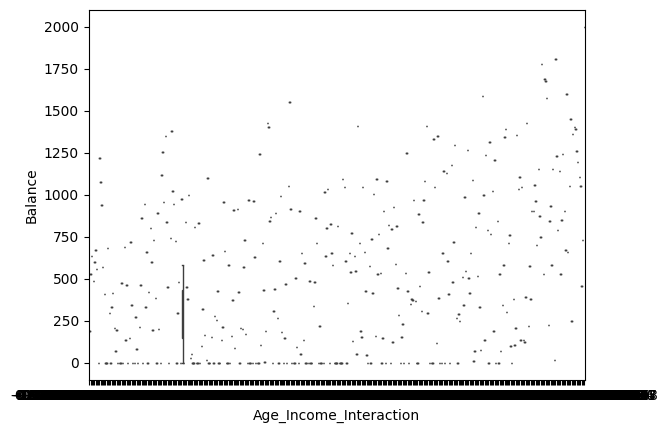

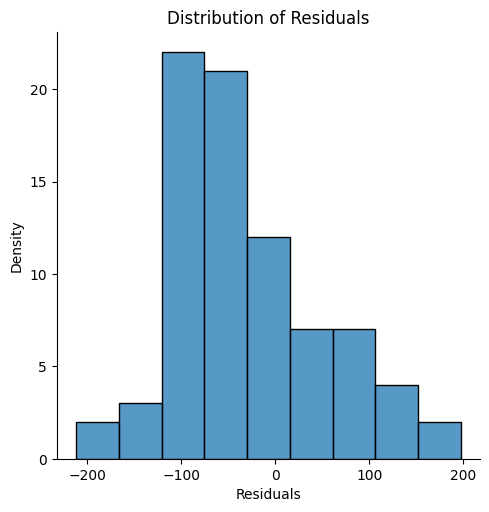

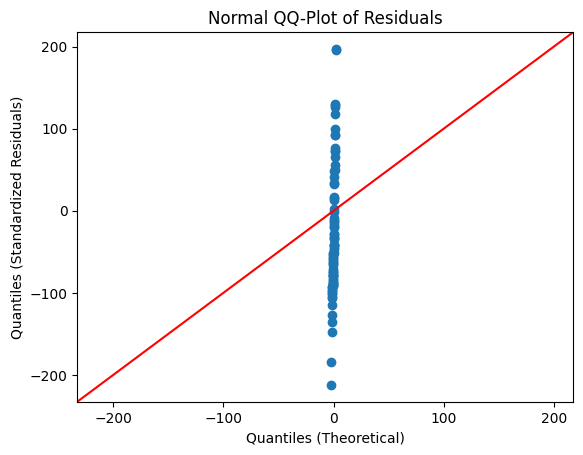

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.graphics.gofplots as smg

# Defining the custom function for adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adjusted_r2

df = pd.read_csv('Credit.csv')

# Pre-processing of data (handling of categorical variables)
categorical_cols = ['Income_Category', 'Age_Category', 'Own', 'Student', 'Married', 'Region']
le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

# Feature scaling (for mixed data types)
numerical_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
                   'Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Spliting of data
X = df.drop('Balance', axis=1)
y = df['Balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Outlier Analysis

# 1. Z-scores for identifying potential outliers
z_scores = np.abs(stats.zscore(df[['Balance']]))
outliers = df[z_scores > 3]

# 2. Visualization
sns.boxplot(x = df['Income_Category'], y = df['Balance'])
plt.show()

sns.boxplot(x = df['Limit'], y = df['Balance'])
plt.show()

sns.boxplot(x = df['Rating'], y = df['Balance'])
plt.show()

sns.boxplot(x = df['Age_Income_Interaction'], y = df['Balance'])
plt.show()

# Residual Analysis

# 1. Calculate residuals
residuals = y_test - y_pred

# 2. Visualize residuals with displot
sns.displot(residuals)
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Distribution of Residuals")
plt.show()

# 3. QQ-plot
smg.qqplot(residuals, line='45')  # Optional line argument for reference line
plt.xlabel("Quantiles (Theoretical)")
plt.ylabel("Quantiles (Standardized Residuals)")
plt.title("Normal QQ-Plot of Residuals")
plt.show()

p-values:
Income                       0.173998
Limit                        0.241212
Rating                       0.658072
Cards                        0.365854
Age                         12.218430
Education                    5.441704
Debt_to_Income_Ratio         1.828439
Credit_Limit_Utilization     0.347985
Income_Category              1.330773
Age_Category                 0.928857
Age_Income_Interaction       2.666898
Own                          1.067553
Student                      0.129362
Married                      1.555082
Region                            NaN

VIFs:
Income                       29.849599
Limit                       269.949033
Rating                      252.544816
Cards                         1.617844
Age                           3.503607
Education                     1.049959
Debt_to_Income_Ratio          4.657399
Credit_Limit_Utilization     21.221572
Income_Category               2.775165
Age_Category                  2.637661
Age_Income_Interaction 

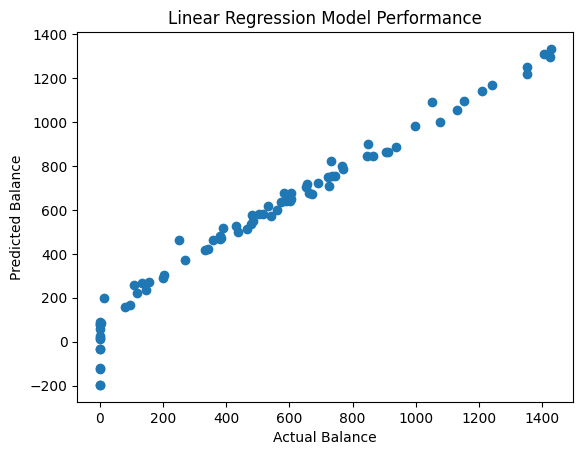

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Defining the custom function for adjusted R-squared
def adjusted_r2_score(y_true, y_pred, n_features):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - n_features - 1))
    return adjusted_r2

df = pd.read_csv('Credit.csv')

# Pre-processing of data (handling of categorical variables)
categorical_cols = ['Income_Category', 'Age_Category', 'Own', 'Student', 'Married', 'Region']
le = LabelEncoder()
for col in categorical_cols:
  df[col] = le.fit_transform(df[col])

# Feature scaling (for mixed data types)
numerical_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education',
                   'Debt_to_Income_Ratio', 'Credit_Limit_Utilization', 'Age_Income_Interaction']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Spliting of data
X = df.drop('Balance', axis=1)
y = df['Balance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# p-values using statsmodels
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()
coefs = model.params[:-1]
stderr = model.bse
pvalues = stderr / np.abs(coefs)
pvalues = pd.Series(pvalues, index=X_train_const.columns[1:])

# VIF calculation
vif = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
vif = pd.Series(vif, index=X_train.columns)


# Print p-values and VIFs
print("p-values:")
print(pvalues.to_string())

print("\nVIFs:")
print(vif.to_string())

# Feature selection based on p-values and VIF thresholds (adjust thresholds as needed)
selected_features = pvalues[pvalues > 0.05].index  # Features with p-value > 0.05 (not statistically significant) might be removed
selected_features = selected_features[vif[selected_features] < 5]  # Features with VIF < 5 are considered for further evaluation

# Re-train the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# Predictions on the testing set
X_test_with_intercept = sm.add_constant(X_test)
y_pred = model.predict(X_test_with_intercept)

# Evaluating model performance (R-squared, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), )
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
adjusted_r2 = adjusted_r2_score(y_test, y_pred, X_test.shape[1])
print(f"Model R-squared (accuracy): {r2:.4f}")
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("Adjusted R-squared:", adjusted_r2)

# Visualizing results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Balance")
plt.ylabel("Predicted Balance")
plt.title("Linear Regression Model Performance")
plt.show()


# Results & Reporting

Based on the provided model evaluation metrics:

*   **Model R-squared (accuracy):**The R-squared value of 0.9561 indicates that the model explains approximately 95.61% of the variance in the target variable. This indicates a strong positive correlation between the features and credit card balance. The model seems to be capturing a significant portion of the variance in the target variable.
*   **Adjusted R-squared:** The adjusted R-squared value of 0.9458 is slightly lower than the R-squared value, indicating that the model's goodness of fit penalizes the addition of unnecessary predictors. The relatively close value to R-squared suggests the model's complexity might not be a major concern. However, a small difference doesn't guarantee the absence of overfitting.
*   **Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):** The MSE and RMSE values of 7334.21 and 85.64, respectively, are relatively low, indicating that the model's predictions are close to the actual values on average.
*   **Mean Absolute Error (MAE):** The MAE value of 73.10 represents the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.

Considering these metrics, the model appears to have performed well on the test data. However, to comment on the bias-variance trade-off, we need to consider the possibility of overfitting or underfitting:

**Potential Overfitting:** Overfitting occurs when the model captures noise or random fluctuations in the training data, leading to poor generalization to unseen data. In this case, a high R-squared value and low error metrics on the test data suggest that overfitting may not be a significant concern. While the R-squared values are high, it's crucial to consider the error metrics alongside them.

> ***Mean Squared Error (MSE: 7334.21) and Root Mean Squared Error (RMSE: 85.64):*** The specific interpretation of these values depends on the scale of 'Balance' variable. However, they represent non-zero errors, suggesting some discrepancy between predicted and actual values.


> ***Mean Absolute Error (MAE: 73.10):*** This non-zero error also indicates some difference between predictions and actual values

**Underfitting:** Underfitting occurs when the model is too simple to capture the underlying patterns in the data. The high R-squared value and low error metrics indicate that the model is capturing a large portion of the variability in the data, suggesting that underfitting is unlikely.


**Conclusion:**

The linear regression model demonstrates strong performance, as evidenced by the high R-squared value and low error metrics. However, further analysis, particularly of residuals, is showing very minor chances of potential overfitting. Regularization techniques can be explored to mitigate overfitting tendencies while maintaining model accuracy.